In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('train.csv')
print(df.columns)

test_df = pd.read_csv('test.csv')
print(df.dtypes.value_counts())
print(df.is_sale.value_counts())

Index(['PHONE_NUMBER', 'SCORE_1_1', 'SCORE_1_2', 'SCORE_1_3', 'SCORE_1_11',
       'SCORE_1_12', 'SCORE_1_4', 'SCORE_1_5', 'SCORE_1_6', 'SCORE_1_13',
       ...
       'SCORE_12_5', 'SCORE_12_6', 'SCORE_12_7', 'SCORE_12_8', 'SCORE_12_9_1',
       'SCORE_12_9_2', 'SCORE_12_10', 'SCORE_13_1', 'SCORE_13_2', 'is_sale'],
      dtype='object', length=184)
float64    136
int64       48
Name: count, dtype: int64
is_sale
0    4342
1     334
Name: count, dtype: int64


In [ ]:
correlation_matrix = df.corr()

print(correlation_matrix)

print(correlation_matrix['is_sale'].sort_values(ascending=False))

              PHONE_NUMBER  SCORE_1_1  SCORE_1_2  SCORE_1_3  SCORE_1_11  \
PHONE_NUMBER      1.000000   0.018205   0.027891   0.034414    0.029506   
SCORE_1_1         0.018205   1.000000   0.958134   0.881327    0.917891   
SCORE_1_2         0.027891   0.958134   1.000000   0.940369    0.970829   
SCORE_1_3         0.034414   0.881327   0.940369   1.000000    0.981588   
SCORE_1_11        0.029506   0.917891   0.970829   0.981588    1.000000   
...                    ...        ...        ...        ...         ...   
SCORE_12_9_2           NaN        NaN        NaN        NaN         NaN   
SCORE_12_10       0.001420  -0.052841  -0.048740  -0.047523   -0.048408   
SCORE_13_1       -0.009607   0.036759   0.034193   0.030047    0.028721   
SCORE_13_2       -0.008639  -0.015630  -0.017152  -0.017573   -0.017442   
is_sale           0.001336  -0.001170  -0.005386  -0.000824   -0.006560   

              SCORE_1_12  SCORE_1_4  SCORE_1_5  SCORE_1_6  SCORE_1_13  ...  \
PHONE_NUMBER   -0.035

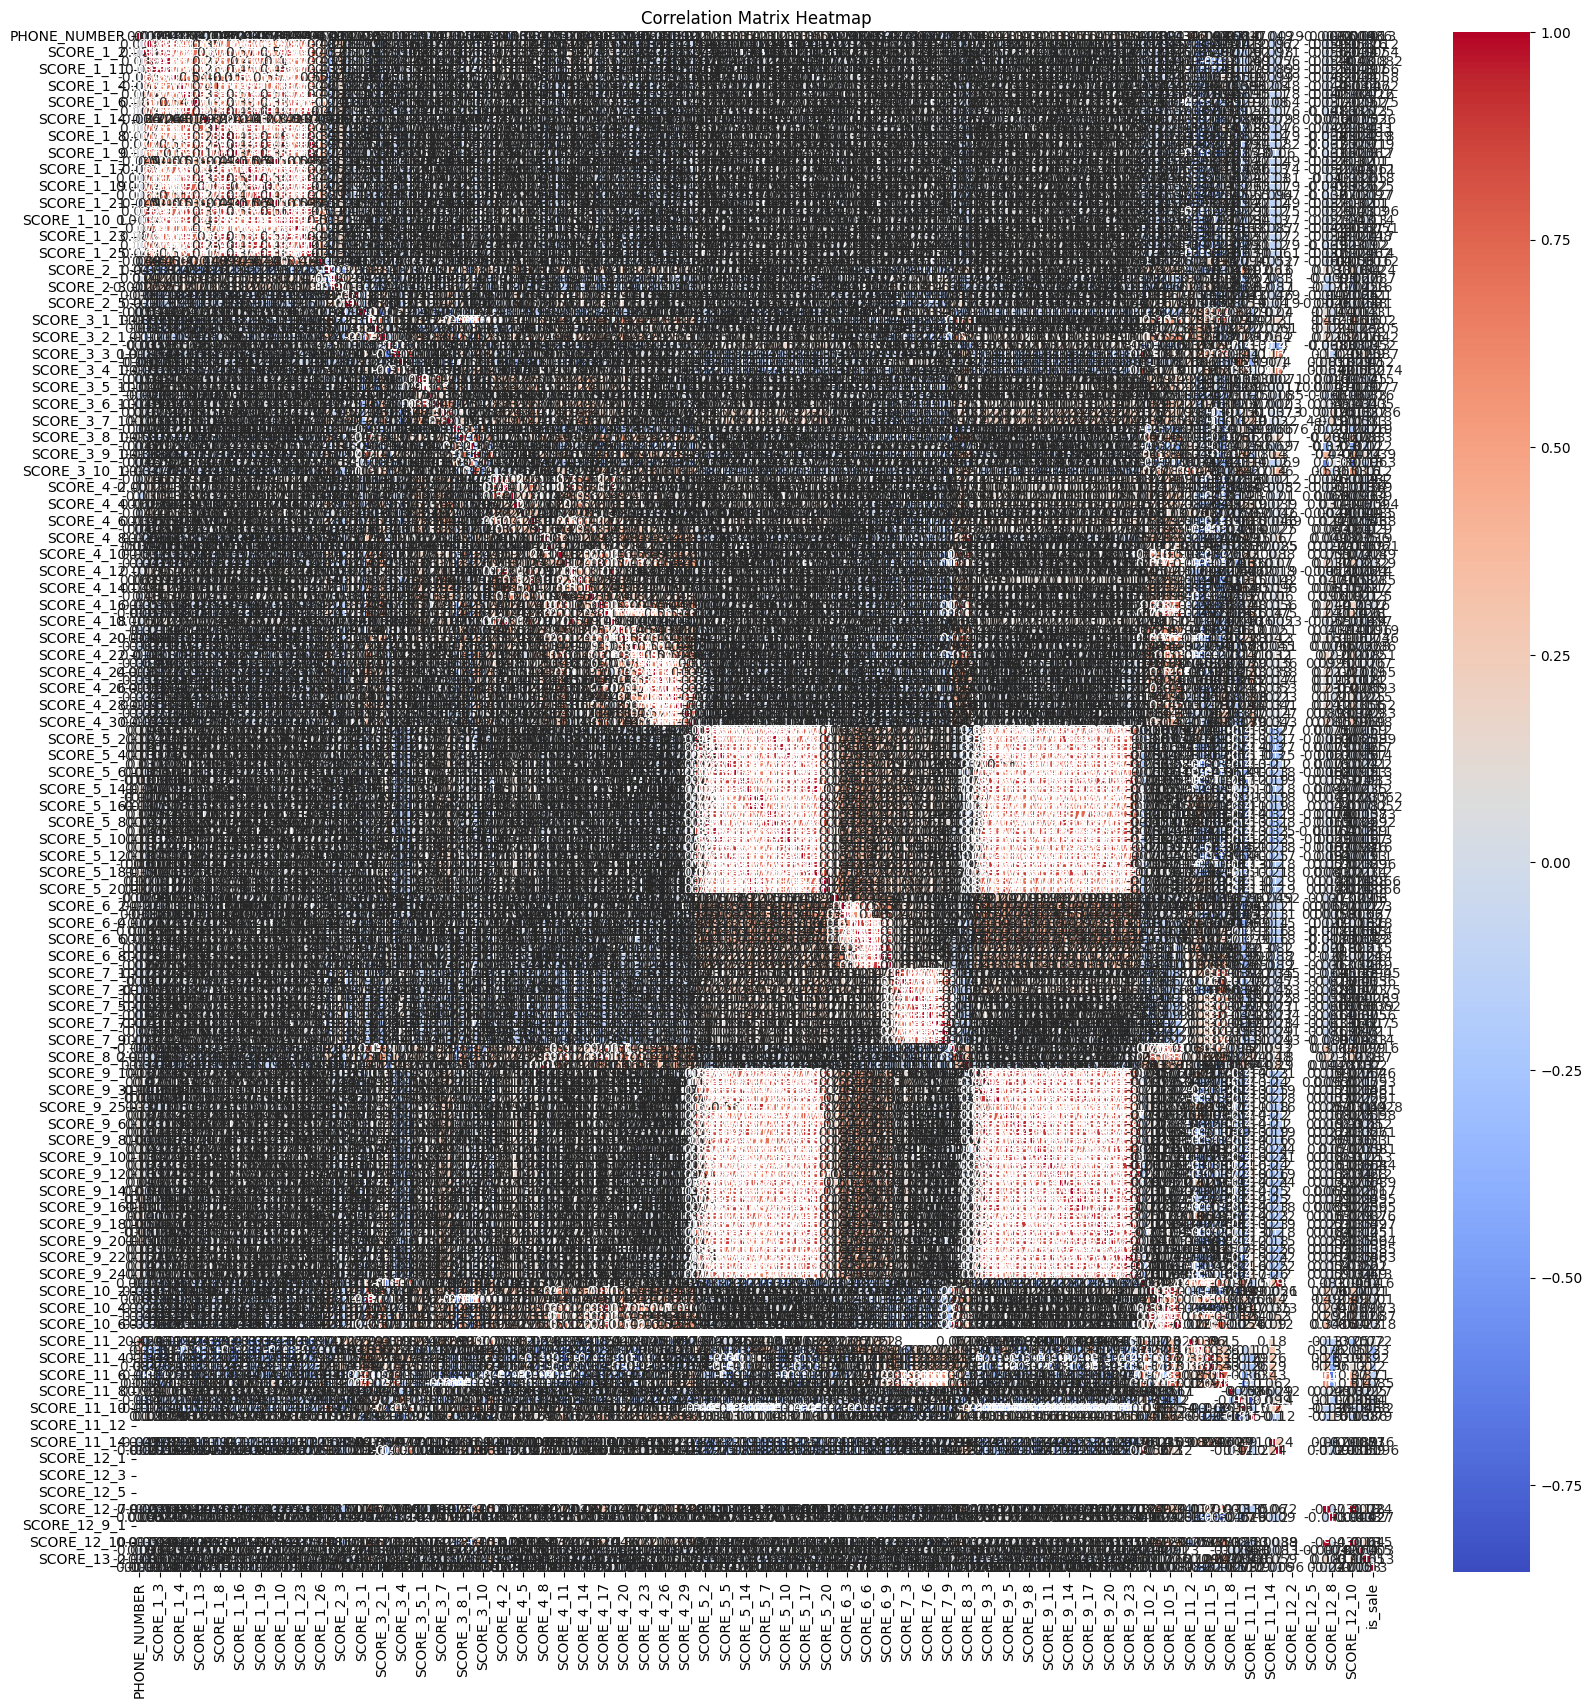

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
threshold = 0.8

correlation_matrix = df.corr().abs()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

df_reduced = df.drop(columns=to_drop)
test_df_reduced = test_df.drop(columns=to_drop)

df_reduced.to_csv('train_reduced.csv', index=False)
test_df_reduced.to_csv('test_reduced.csv', index=False)

In [ ]:
correlation_matrix_reduced = df_reduced.corr()

# print(correlation_matrix_reduced)

print(correlation_matrix_reduced['is_sale'].sort_values(ascending=False))

is_sale         1.000000
SCORE_11_2      0.072232
SCORE_4_1       0.032450
SCORE_6_1       0.030483
SCORE_4_7       0.029190
                  ...   
SCORE_12_4           NaN
SCORE_12_5           NaN
SCORE_12_6           NaN
SCORE_12_9_1         NaN
SCORE_12_9_2         NaN
Name: is_sale, Length: 73, dtype: float64


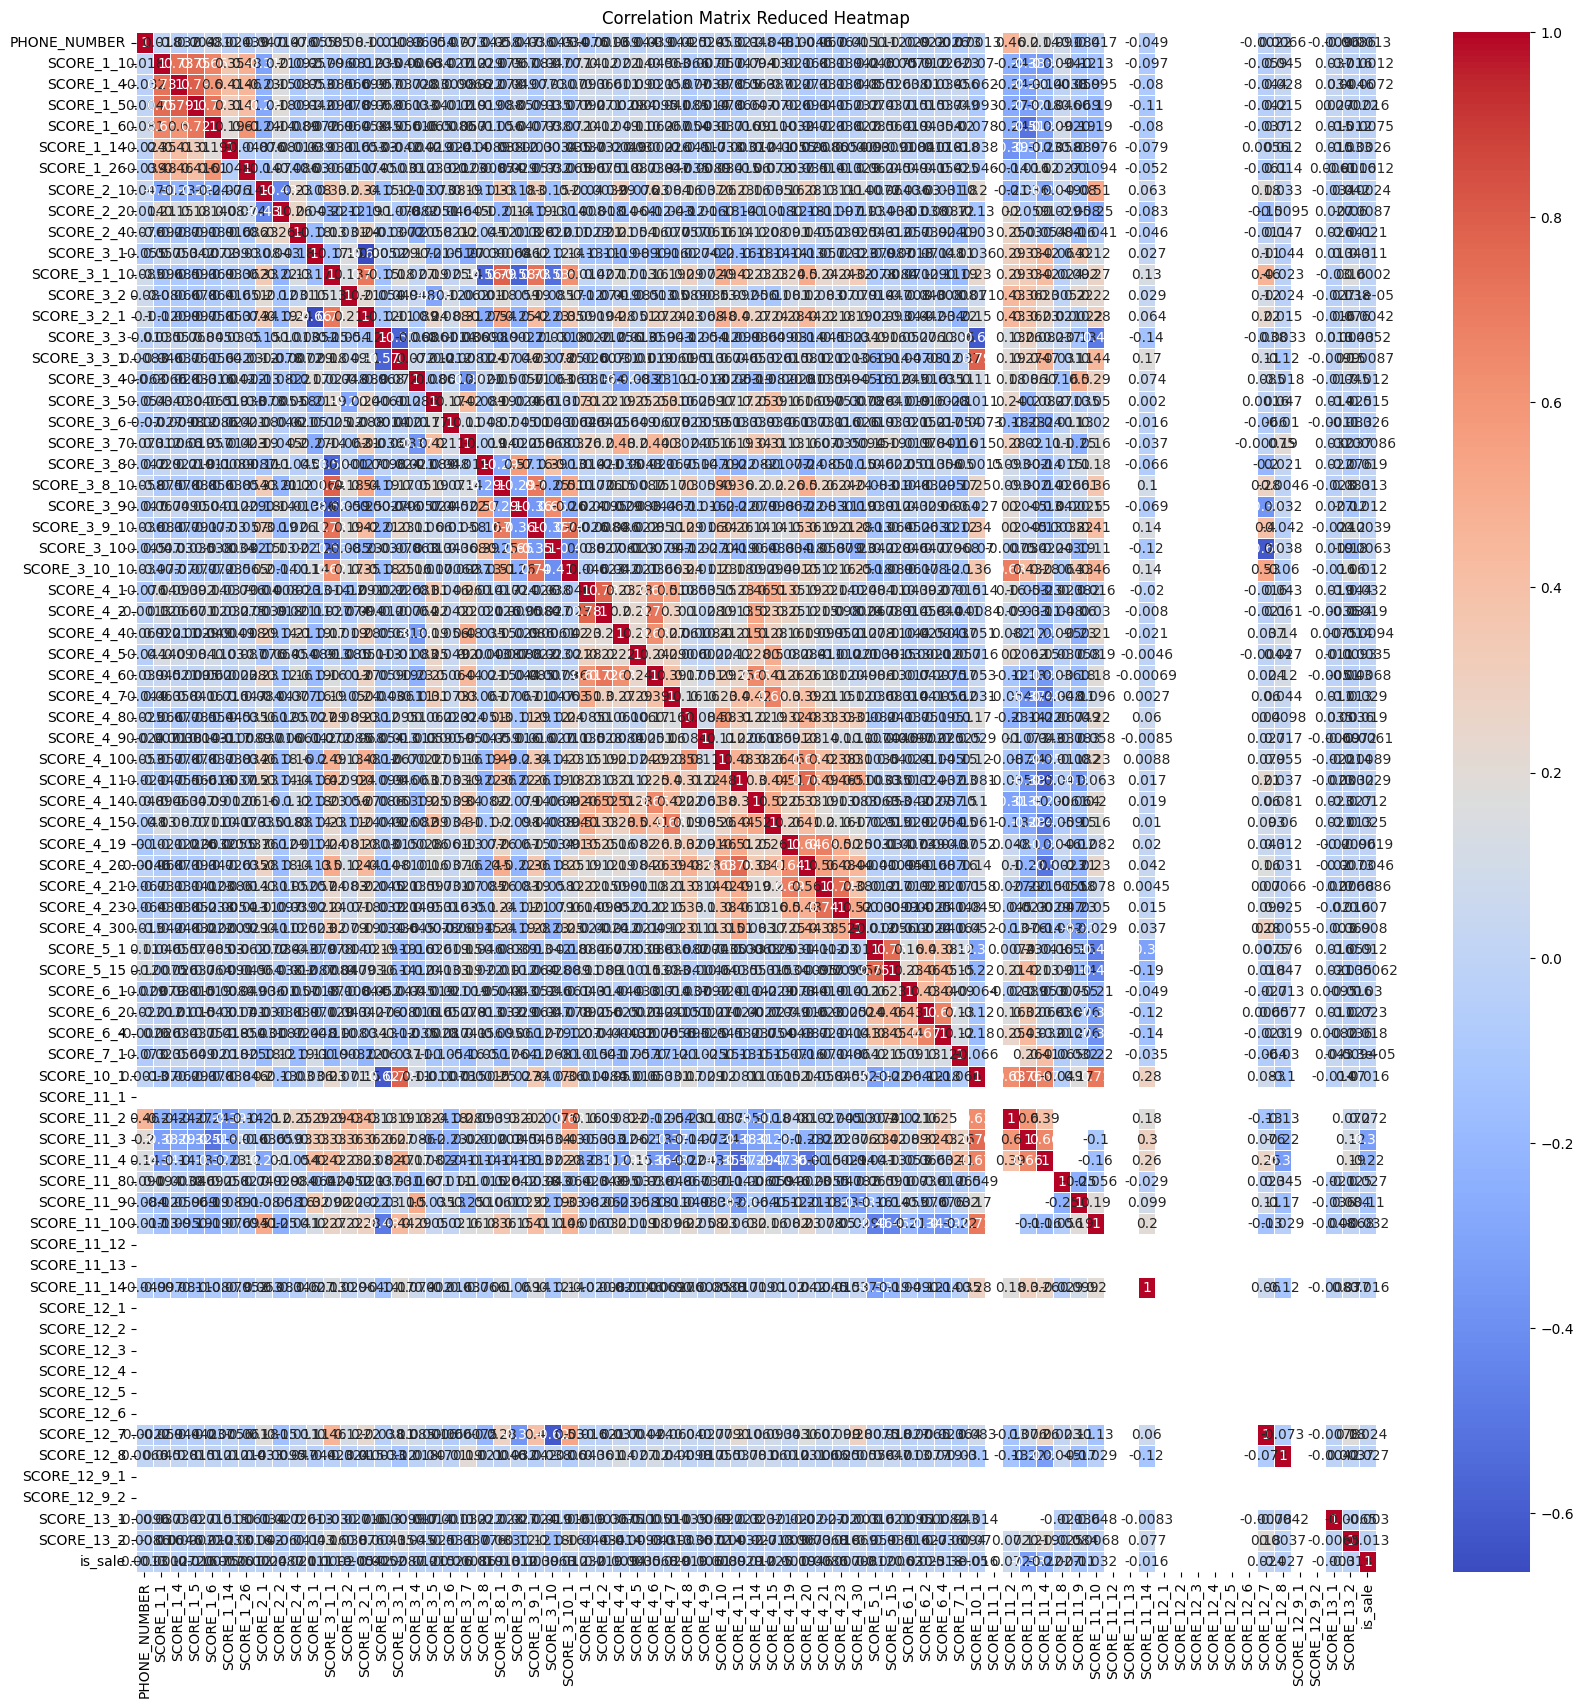

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Reduced Heatmap')
plt.show()